## 참고한 사이트

AIFFEL 1기 코드 : https://github.com/ljh415/AIFFEL/blob/master/Exploration/01.rock_scissors_paper/review_rcp.ipynb    
이현승님 코드 : https://ceuity.tistory.com/3


### 코드 설명
해당 코드는 다음과 같은 순서를 거친다.   
1. 패키지 설치
2. 이미지 리사이징 (224x224 ==> 28x28)
3. 데이터 라벨링 및 정규화
4. 이미지 및 라벨링 확인(시각화)
5. 딥러닝 설계 (파라미터 조정)
6. 딥러닝 학습 (epochs 조정)
7. 테스트 데이터 라벨링 및 정규화
8. 모델 평가

### 데이터 설명
- 데이터는 이현승님께서 올려주신 통합본을 사용
- 테스트 데이터는 이창호님 이미지를 사용 (나머지 10명은 훈련 데이터)

### 후기
다른 사람과 동일한 데이터, 동일한 파라미터, 동일한 코드를 돌려도 정확도가 다른 어메이징~   
아마도 내가 뭔가를 다르게 설정한 듯하다.

아니 왜 Accuracy가 안 올라가냐고!!    
parameter와 data만 조정해서는 최대 0.5가 한계였다..  (가중치가 기가 막히게 잘 나왔을 때였던 것 같다.)  

다음에 다른 사람 코드를 보면서 좀 더 고쳐나가야겠다.

In [86]:
# 패키지 설치
import os
import numpy as np

In [87]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [79]:
# 가위 이미지 리사이즈

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/train/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

# 바위 이미지 리사이즈

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/train/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

# 보 이미지 리사이즈

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/train/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/train/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/train/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/train/paper
보 이미지 resize 완료!


In [88]:
# 데이터 불러오기 및 라벨링

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3000   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


라벨:  0


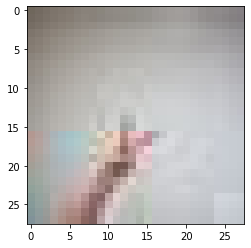

In [89]:
# 맞는지 시각화

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [106]:
# 딥러닝 네트워크 설계

# 패키지 설치
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

# 32 64 64 10 : 0.4900
# 32 64 128 10 : 0.4867
# 32 64 256 10 : 0.4467
# 64 128 128 10 : 0.4933 / 0.5100 ==> 이거로 기준 설정
# 64 64 128 10 : 0.2933
# 64 128 512 10 : 0.4333
# 128 256 256 10 : 0.4633
# 128 256 512 10 : 0.4833

# epochs? 
# 64 128 128 8 : 0.5400 / 0.4333
# 64 128 512 8 : 0.4533
# 128 256 512 12 : 0.5333 / 0.5100 / 0.4367
# 128 256 512 15 : 0.4733

n_channel_1=64
n_channel_2=128
n_dense=128
n_train_epoch=30

# 뒤에 28, 28, 3 으로 바꿀 것
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               409728    
_________________________________________________________________
dense_35 (Dense)             (None, 3)               

In [107]:
# 딥러닝 네트워크 학습

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

# 채널 수에 대한 정보 (RGB=3)
# print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
# x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)
# print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
      
# 학습 시키기
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),   ## 제발!!! 오네가이!!!! 좀 !!!!        #'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=30)

Epoch 1/30
94/94 [==============================] - 0s 2ms/step - loss: 1.0130 - accuracy: 0.4870
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.7173
Epoch 3/30
94/94 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.8250
Epoch 4/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2893 - accuracy: 0.9017
Epoch 5/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9283
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1473 - accuracy: 0.9553
Epoch 7/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.9687
Epoch 8/30
94/94 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.9753
Epoch 9/30
94/94 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9817
Epoch 10/30
94/94 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9867
Epoch 11/30
94/94 [

In [108]:
# 딥러닝 test 데이터 만들기

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
def re_load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/test"
(x_test, y_test)= re_load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [109]:
# 모델평가

# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1000.4399 - accuracy: 0.4467
test_loss: 1000.4398803710938 
test_accuracy: 0.4466666579246521
